<a href="https://colab.research.google.com/github/VedereArtificiala/prelucrareaimaginilor-proiect-nunu1/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import imutils
from google.colab import drive
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from time import sleep

# Initializing the HOG person
# detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


#cap = cv2.VideoCapture('/content/drive/MyDrive/PI-P Data/y2mate.com - People Walking Free Stock Footage RoyaltyFree No Copyright Content_1080p.mp4')
cap = cv2.VideoCapture('/content/drive/MyDrive/PI-P Data/PITest.mp4')


multiTracker = None

#out = cv2.VideoWriter(
#    '/content/drive/MyDrive/PI-P Data/output.avi',
#    cv2.VideoWriter_fourcc(*'MJPG'),
#    15.,
#    (640,480))

count = 0
frames = []

while True:
#while cap.isOpened():
	# Reading the video stream
	ret, frame = cap.read()
 			#frame = cv2.resize(frame, (640, 400))



	if ret:

		if count == 0:
			frame = imutils.resize(frame, width = 1080)
			# using a greyscale picture, also for faster detection
			gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

			multiTracker = cv2.legacy.MultiTracker_create()
			# detect people in the image
			# returns the bounding boxes for the detected objects
			boxes, weights = hog.detectMultiScale(frame, winStride=(4,4),scale=1.05 )

			boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

			for (xA, yA, xB, yB) in boxes:
					# display the detected boxes in the colour picture
					cv2.rectangle(frame, (xA, yA), (xB, yB),
															(0, 255, 0), 2)
		 # add boxes to tracker and recalculate the coord (HOG and multiTracker return diferent formats)
			for box in boxes:
				multiTracker.add(cv2.legacy.TrackerKCF_create(), frame, (box[0], box[1], box[2] - box[0], box[3] - box[1]))


		else:
			frame = imutils.resize(frame, width = 1080)
			# using a greyscale picture, also for faster detection
			gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

			success, boxes = multiTracker.update(frame)

				# draw tracked objects
			for box in boxes:
				x1, y1, w, h = [int(i) for i in box]
				x2, y2 = x1 + w, y1 + h
				cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)


		# Showing the output Image
		frames.append(frame)

		if count != 50:
			count += 1
		else:
			count = 0


		if cv2.waitKey(1) & 0xFF == ord('q'):
			break
	else:
		break



cap.release()
cv2.destroyAllWindows()

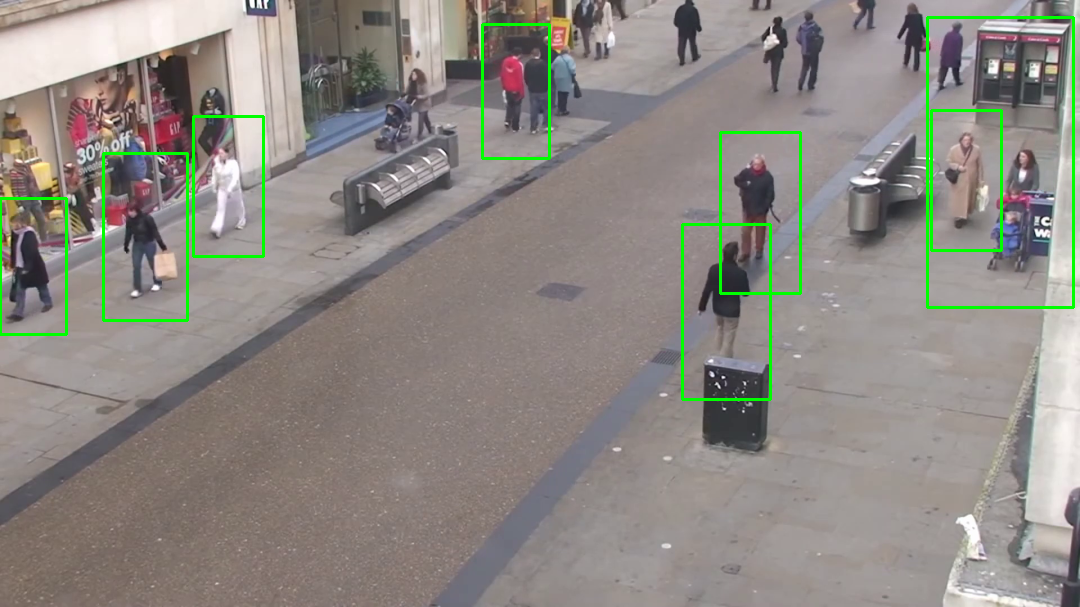

In [3]:
for cur_frame in frames:
  clear_output()
  cv2_imshow(cur_frame)
  sleep(0.1)

# New Section

In [ ]:
%cd /content
!git clone https://github.com/opencv/opencv
!git clone https://github.com/opencv/opencv_contrib
!mkdir /content/build
%cd /content/build

!cmake -DOPENCV_EXTRA_MODULES_PATH=/content/opencv_contrib/modules  \
        -DBUILD_SHARED_LIBS=OFF \
        -DBUILD_TESTS=OFF \
        -DBUILD_PERF_TESTS=OFF \
        -DBUILD_EXAMPLES=OFF \
        -DWITH_OPENEXR=OFF \
        -DWITH_CUDA=ON \
        -DWITH_CUBLAS=ON \
        -DWITH_CUDNN=ON \
        -DOPENCV_DNN_CUDA=ON \
        /content/opencv

!make -j8 install

import cv2
cv2.__version__

/content
Cloning into 'opencv'...
remote: Enumerating objects: 325334, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 325334 (delta 3), reused 3 (delta 0), pack-reused 325320
Receiving objects: 100% (325334/325334), 514.30 MiB | 29.24 MiB/s, done.
Resolving deltas: 100% (226759/226759), done.
Updating files: 100% (7236/7236), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 39955, done.
remote: Counting objects: 100% (819/819), done.
remote: Compressing objects: 100% (448/448), done.
remote: Total 39955 (delta 381), reused 649 (delta 316), pack-reused 39136
Receiving objects: 100% (39955/39955), 134.87 MiB | 29.83 MiB/s, done.
Resolving deltas: 100% (24834/24834), done.
/content/build
-- 'Release' build type is used by default. Use CMAKE_BUILD_TYPE to specify build type (Release or Debug)
-- The CXX compiler identification is GNU 11.4.0
-- The C compiler identification is GNU 11.4.0
-- Detecting CXX 

In [ ]:
#SAVE OPENCV CUDA LIB
!mkdir  "/content/drive/My Drive/cv2_cuda"
!cp  /content/build/lib/python3/cv2.cpython-36m-x86_64-linux-gnu.so   "/content/drive/My Drive/cv2_cuda"

In [ ]:
#USE OPENCV CUDA lib
!cp "/content/drive/My Drive/cv2_cuda/cv2.cpython-36m-x86_64-linux-gnu.so" .